# Защита персональных данных клиентов

## Обзор данных

In [1]:
import pandas as pd #импорт библиотеки pandas
import numpy as np #импорт библиотеки numpy

from sklearn.linear_model import LinearRegression #импортируем LinearRegression из библиотеки sklearn
from sklearn.metrics import r2_score #импортируем r2_score из библиотеки sklearn

In [2]:
df = pd.read_csv('insurance.csv') #чтение файла `insurance.csv` и сохранение в переменной `df`

In [3]:
df.sample(5) # просмотр 5 строк таблицы `df`

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2363,0,37.0,33400.0,1,0
1629,1,27.0,46600.0,2,0
4140,1,38.0,48000.0,1,0
323,0,20.0,52000.0,1,0
209,0,22.0,40100.0,1,0


In [4]:
df.info() #получение общей информации о таблице `df`

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В таблице 5 столбцов. Типы данных в столбцах: float64 и int64.

Согласно документации к данным:
* `Пол` — пол застрахованного клиента;
* `Возраст` — возраст застрахованного клиента;
* `Зарплата` — зарплата застрахованного клиента;
* `Члены семьи` — количество членов семьи застрахованного клиента;
* `Страховые выплаты` — количество страховых выплат клиенту за последние 5 лет.

Целевой признак - `Страховые выплаты`.

Названия столбцов не соответствуют хорошему стилю: используется кириллица, cтрочные буквы сочетаются с прописными и встречаются названия, состоящие из нескольких слов, написанных через пробел.

Количество значений в столбцах не отличается - значит пропущенных значений нет.

### Выводы

В каждой строке таблицы — данные о клиентах страховой компании «Хоть потоп». Часть колонок описывает самих клиентов: пол, возраст, члены семьи. Другие данные отображают финансовую информацию клиентов и наличие страховых выплат: зарплата и страховые выплаты.

Предварительно можно утверждать, что, данных достаточно для решения поставленной задачи. Но в названиях колонок — расхождения с хорошим стилем. Также данные в столбцах `Возраст` и `Зарплата` лучше перевести в формат int64 для дальнейшего удобства работы с ними.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Названия столбцов

На этапе обзора данных мы обнаружили, что названия столбцов не соответствуют хорошему стилю: названия написаны кириллицей, cтрочные буквы сочетаются с прописными и встречаются названия, состоящие из нескольких слов, написанных через пробел. Исправим названия в соответствие с хорошим стилем.

In [5]:
# получим названия всех колонок
df.columns

Index(['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты'], dtype='object')

In [6]:
# переименуем столбцы
df.columns = ['gender', 'age', 'salary', 'family_members', 'insurance_payments']

In [7]:
# проверим изменения
df.head(3)

,gender,age,salary,family_members,insurance_payments
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0


**Выводы**

На данном этапе мы исправили названия столбцов в соответствие с хорошим стилем: привели все названия к нижнему регистру, использовали зменный регистр и латиницу.

### Изменение типов данных

Выведем ещё раз общую информацию о датафрейме.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_payments  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [9]:
# проверим уникальные знаяения в столбце `age`
sorted(df['age'].unique())

[18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 65.0]

Возраст клиентов указан в целых числах, поэтому преобразуем формат данных в int64. Также можем зафиксировать, что данные в столбце корректны.

In [10]:
# поменяем тип данных в столбце на int64
df['age'] = df['age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   salary              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_payments  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [11]:
# проверим уникальные знаяения в столбце `salary`
sorted(df['salary'].unique())

[5300.0,
 6000.0,
 7400.0,
 8900.0,
 9800.0,
 10000.0,
 10600.0,
 10800.0,
 11000.0,
 11200.0,
 11300.0,
 12200.0,
 12900.0,
 13000.0,
 13200.0,
 13300.0,
 13400.0,
 13500.0,
 13800.0,
 13900.0,
 14100.0,
 14300.0,
 14400.0,
 14500.0,
 14600.0,
 14700.0,
 15000.0,
 15100.0,
 15200.0,
 15600.0,
 15700.0,
 15900.0,
 16000.0,
 16200.0,
 16300.0,
 16400.0,
 16500.0,
 16600.0,
 16700.0,
 17000.0,
 17100.0,
 17300.0,
 17400.0,
 17500.0,
 17600.0,
 17700.0,
 17800.0,
 17900.0,
 18100.0,
 18200.0,
 18300.0,
 18400.0,
 18600.0,
 18700.0,
 18800.0,
 18900.0,
 19000.0,
 19100.0,
 19200.0,
 19300.0,
 19400.0,
 19600.0,
 19700.0,
 19900.0,
 20000.0,
 20100.0,
 20200.0,
 20300.0,
 20400.0,
 20500.0,
 20600.0,
 20700.0,
 20800.0,
 20900.0,
 21000.0,
 21100.0,
 21200.0,
 21300.0,
 21400.0,
 21500.0,
 21600.0,
 21700.0,
 21800.0,
 21900.0,
 22000.0,
 22100.0,
 22200.0,
 22300.0,
 22500.0,
 22600.0,
 22700.0,
 22800.0,
 22900.0,
 23000.0,
 23100.0,
 23200.0,
 23300.0,
 23400.0,
 23500.0,
 23600.0,
 2370

В данных всртечаются нецелочисленные значения, поэтому оставляем формат без изменений.

**Выводы**

На данном этапе мы исправили тип данных в столбце `age`, чтобы сделать их более читабельными.

### Проверка данных на аномалии

Проверим уникальные значения в столбце `gender`.

In [12]:
df['gender'].unique()

array([1, 0])

Аномальных значений не обнаружено.

Проверим уникальные значения в столбце `family_members`.

In [13]:
df['family_members'].unique()

array([1, 0, 2, 4, 3, 5, 6])

Аномальных значений не обнаружено.

Проверим уникальные значения в столбце `insurance_payments`.

In [14]:
df['insurance_payments'].unique()

array([0, 1, 2, 3, 5, 4])

Аномальных значений не обнаружено.

**Выводы**

Аномальных значений в таблице не обнаружено.

### Дополнительный анализ данных

In [15]:
# посмотрим информацию о данных при помощи функции describe()
df.describe()

,gender,age,salary,family_members,insurance_payments
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Можно увидеть, что в таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане.

Дополнительно посмотрим корреляцию между возрастом и количеством страховых выплат клиентам за последние 5.

In [16]:
df['age'].corr(df['insurance_payments'])

0.6510300979467276

Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.

Для оценки влияния возраста на количество страховых выплат посторим диаграмму рассеяния.

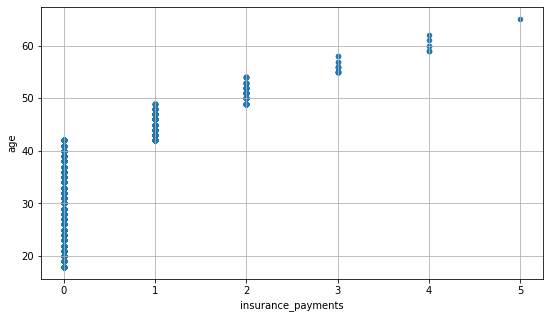

In [22]:
df.plot(x='insurance_payments', y='age', kind='scatter', grid=True, alpha=1, figsize=(9,5));

In [28]:
df.pivot_table(index='insurance_payments', values='age', aggfunc=['max', 'count']).reset_index()

,insurance_payments,max,count
,,age,age
0,0,42,4436
1,1,49,423
2,2,54,115
3,3,58,18
4,4,62,7
5,5,65,1


По диаграмме и сводной таблице видно, что все клиенты в возрасте до 42 лет не получали ни одной страховой выплаты, в возрасте до 49 лет только одну выплату, до 55 лет две выплаты, до 59 лет три выплаты, до 65 лет четыре выплаты. Только один клиент получил максимальное количество выплат за пять лет - пять выплат в возрасте 65 лет.

**Выводы**

По итогам анализа даннных можно сделать вывод о том, что: 
* компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет;
* компания скорее работает со средним экономическим классом, чем с слишком бедными или слишком богатыми гражданами;
* вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще;
* клиенты в озрасте до 42 лет не получали ни одной страховой выплаты и таких клиентов большинство - почти 89%.

### Проверка на  дубликаты

Проверим таблицу на наличие явных дубликатов.

In [30]:
print ('Дубликатов в таблице:', df.duplicated().sum())

Дубликатов в таблице: 153


Удалим обнаруженные дубликаты и проверим выполненные изменения.

In [31]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [32]:
# новые размеры таблицы
df.shape

(4847, 5)

In [33]:
df.sample(5)

,gender,age,salary,family_members,insurance_payments
4994,1,26,51400.0,0,0
1102,1,36,47100.0,1,0
3494,1,25,50500.0,0,0
4508,0,28,48500.0,2,0
4841,0,25,42600.0,1,0


**Выводы**

Обнаружены явные дубликаты в количестве - 153 строки. Дубликаты удалены.

### Выводы

На этапе предобработки данных мы выполнили следующие задачи:
* исправили названия столбцов таблицы в соответствие с хорошим стилем;
* изменили тип данных в столбце `age`, чтобы сделать их более читабельными;
* проверили данные на аномалии - аномалий не обнаружено;
* проверили основные характеристики данных и корелляцию между возрастом и количеством страховых выплат клиентам;
* проверили таблицу на наличие дубликатов, дубликаты удалены.

Данные готовы для дальнейшей работы по выбору метода преобразования данных.

## Умножение матриц

### Обучение и проверка модели на данных до изменений

Для решения поставленной задачи подготовим отдельные таблицы с признаками, определяющими целевой признак, и целевым признаком.

In [34]:
features = df.drop('insurance_payments', axis=1)
target = df['insurance_payments']

# проверим размеры полученных таблиц
print(features.shape)
print(target.shape)

(4847, 4)
(4847,)


Напишем функцию для модели LinearRegression, чтобы в дальнейшем было удобнее проверять преобразованные данные.

In [35]:
def LinearReg(features, target):
    model = LinearRegression()
    model.fit(features, target)
    predictions = model.predict(features)
    R2 = r2_score(target, predictions)
    
    return f'R2 = {R2}'

In [36]:
print(LinearReg(features, target))

R2 = 0.4302010044852067


**Выводы**

На данном этапе мы раздедили данные на обучающие и валидационные выборки, обучили модель линейная регрессия и рассчитали метрику R2 для дальнейшего сравнея с ней изменённых данных.

### Умножение признаков на обратимую матрицу

В матрицу признаков добавим столбец, состоящий только из единиц (он идёт нулевым); в дальнейшем сдвиг умножится на вектор из единиц (нулевой столбец).

In [37]:
X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
X.shape

(4847, 5)

Создадим рандомную квадратную матрицу размером равным количеству признаков с учётом сдвига в таблице с признакми для умножения в последующем на матрицу признаков.

In [38]:
random_matrix = np.random.normal(size=(X.shape[1], X.shape[1]))
random_matrix.shape

(5, 5)

Проверим созданную матрицу на обратимость.

In [39]:
np.linalg.det(random_matrix) != 0

True

Матрица является обратимой. Умножим признаки на полученную матрицу.

In [40]:
features_new = X @ random_matrix

Проверим как изменилось качество линейной регрессии.

In [41]:
print(LinearReg(features_new, target))

R2 = 0.4301985045366037


**Вывод**

При умножении признаков на обратимую матрицу качество линейной регрессии почти не изменится. 

Если учесть формулу рассчёта предсказания модели линейной регрессии:

$$
a = Xw
$$

где:

- $a$ — вектор предсказаний целевого признака

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

то видно, что вектор предсказаний получается из скалярного произведения вектора признаков на вектор весов с учётом величина сдвига предсказания. При этом когда мы умножаем матрицу признаков на матрицу с рандомными значениями, для алгоритма линейной регресси по сути ничего не меняется, так как подбор параметров (w) всё равно будет происходить таким образом, что значение функции потерь на обучающей выборке будет минимальным.

### Выводы

На данном этапе мы раздедили данные на обучающие и валидационные выборки, обучили модель линейная регрессия и рассчитали метрику R2 и проверили влияние умножения матрицы признаков на обратимую матрицу на данную метрику - влияния нет.

## Алгоритм преобразования

Исходя из полученных результатов п.3 для решения поставленной задачи достаточно создать рандомно обратимую матрицу и умножить на неё матрицу признаков - в этом случае по новой полученной матрице будет сложно восстановить персональную информацию за неимением матрицы-ключа и при этом качество модели Линейная регрессия не ухудшится.

Создадим ещё раз рандомную матрицу размером равным количеству признаков с учётом сдвига, сохраним её в переменной `maatrix_key`.

In [42]:
matrix_key = np.random.normal(size=(X.shape[1], X.shape[1]))
matrix_key.shape

(5, 5)

Проверим созданную матрицу на обратимость.

In [43]:
np.linalg.det(matrix_key) != 0

True

Преобразуем матрицу признаков, умножив её на полученную матрицу.

In [44]:
features_new = X @ matrix_key
features_new

array([[-40136.68464689,  44008.90085203, -21373.42698227,
         10425.49914095,    585.89049344],
       [-30746.82588208,  33724.09980303, -16391.10611243,
          7991.17015151,    452.15225723],
       [-16991.4909632 ,  18639.04778382,  -9062.63783252,
          4416.77686936,    250.90388865],
       ...,
       [-27433.09043087,  30073.80523114, -14598.09013366,
          7123.90846634,    397.79116671],
       [-26461.93860839,  29007.0967921 , -14080.7934677 ,
          6873.68865544,    382.87138506],
       [-32855.05752935,  36020.02514383, -17488.4730492 ,
          8532.43957446,    478.03109239]])

### Выводы

На данном этапе мы зафиксировали алгоритм преобразования матрицы признаков и преобразовали с помощью него таблицу с признаками.

## Проверка алгоритма

Проверим, что что качество Линейной регрессии не отличается до и после преобразования матрицы признаков, применив метрику R2.

In [45]:
print(LinearReg(features_new, target))

R2 = 0.4302262180611469


### Выводы

На данном этапе мы проверили, что значение метрики качества Линейной регрессии R2 не изменилось.

## Общий вывод

Исследование проводилось в пять этапов:

* На этапе Обзор данных мы ознакомились с данными в предоставленной таблице и зафиксировали, что предварительно данных для проведения исследования достаточно;
* На этапе Предобработка данных мы исправили названия столбцов таблицы в соответствие с хорошим стилем, изменили тип данных в столбце `age`, проверили данные на аномалии - аномалий не обнаружено, проанализировали данные и их корелляцию, проверили таблицу на наличие дубликатов, дубликаты удалены;
* На этапе Умножение матриц проверили влияние умножения матрицы признаков на обратимую матрицу на данную метрику - влияния нет;
* На этапе Алгоритм преобразования мы зафиксировали алгоритм преобразования матрицы признаков и преобразовали с помощью него таблицу с признаками;
* На этапе Проверка алгоритма - убедились, что значение метрики качества Линейной регрессии R2 не изменилось после преобразования матрицы признаков.

На основании полученных результатов исследования можно утвержать, что умножения матрицы признаков на обратимую матрицу не влияет на изменение качества модели Линейная регрессия.